<a href="https://colab.research.google.com/github/Pinxis/Pinxis/blob/main/Pan_Card_Tampering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing necessary packages
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [2]:
#Creating folders to store the images
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

In [3]:
#Opening images
original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg', stream=True).raw)
tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png', stream=True).raw)

In [4]:
#File format of the source file
print('Original image format:', original.format)
print('Tampered image format:', tampered.format)

#Image size, in pixels. The size is given as a 2-tuple (width, height).
print('Original image size:', original.size)
print('Tampered image size:', tampered.size)

Original image format: JPEG
Tampered image format: PNG
Original image size: (1200, 800)
Tampered image size: (282, 179)


In [5]:
#resizing the images
original = original.resize ((250,160))
print (original.size)
original.save('pan_card_tampering/image/original.png') #saves image
tampered= tampered.resize ((250,160))
print(tampered.size)
tampered.save('pan_card_tampering/image/tampered.png') #saves image

(250, 160)
(250, 160)


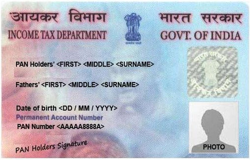

In [6]:
#Display original image
original

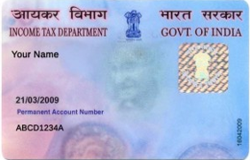

In [7]:
#Display submitted image
tampered

In [8]:
#Loading the input images
original =cv2.imread('pan_card_tampering/image/original.png')
tampered =cv2.imread('pan_card_tampering/image/tampered.png')

In [9]:
#Converting to grayscale
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

In [10]:
(score, diff)= structural_similarity(original_gray, tampered_gray, full=True)
diff= (diff*225).astype('uint8')
print('SSIM:{}'.format(score))

SSIM:0.31686135690489126


In [11]:
#Calculating threshold and contours
thresh = cv2.threshold(diff,0,255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts= cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [12]:
# Looping over the contours
for c in cnts:
  # Applying contours on images
  (x,y,w,h) = cv2.boundingRect(c)
  cv2.rectangle(original, (x,y),(x+w,y+h),(0,0,255),2)
  cv2.rectangle(tampered, (x,y),(x+w,y+h),(0,0,225),2)

Original image


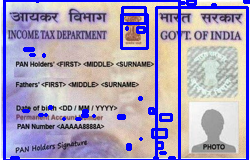

In [13]:
# Displaying original image with contours
print ('Original image')
Image.fromarray(original)

Tampered image


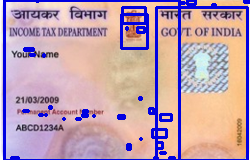

In [14]:
# Displaying tampered image with contours
print ('Tampered image')
Image.fromarray(tampered)

Different Image


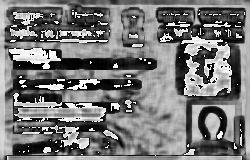

In [15]:
# Displaying different image with black
print('Different Image')
Image.fromarray(diff)

Threshold Image


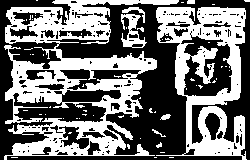

In [16]:
# Displaying threshold image with white
print ('Threshold Image')
Image.fromarray(thresh)

Summary:
 Finding out the structural similarities of the images has helped us find the difference and similarity in the images.
 Finding out the threshold and contours of the images converted to grayscale binary has also helped us in the analysis.
 With an SSIM of 31.25 we can say that the image provided is fake.
